In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("C:\\Users\\Kasutaja\\Downloads\\loan.csv")
data.head(2)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False


In [75]:
data.shape

(5000, 18)

In [74]:
#----------------*****DATA CLEANING**********-------------------------------------


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [6]:
data.marital_status.isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: marital_status, Length: 5000, dtype: bool

In [7]:
data.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [8]:
#----Changing Datatype
data['application_date']= pd.to_datetime(data['application_date'],dayfirst=True).dt.date
data['approval_date']= pd.to_datetime(data['approval_date'],dayfirst=True).dt.date
data['disbursement_date']= pd.to_datetime(data['disbursement_date'],dayfirst=True).dt.date
data['due_date']= pd.to_datetime(data['due_date'],dayfirst=True).dt.date

In [9]:
data.head(2)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,2018-04-05,2018-04-23,2018-04-24,2018-08-14,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,2022-12-30,2022-12-31,2023-01-12,2023-04-05,False


In [10]:
#------Missing Value------------

#---Applying Only on variables with NaN values
for i in data.columns[data.isnull().any(axis=0)]:     
    data[i].fillna(data[i].mean(),inplace=True)

In [11]:
#-----------------Data Exploratory-------------------------------------------


In [12]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [13]:
#create custom columns
data["default_classify"]= data.default_status.map({True:"Defaulters", False:"Non_Defaulters"})

In [14]:
# ------------------------Data visualization--------------------------------


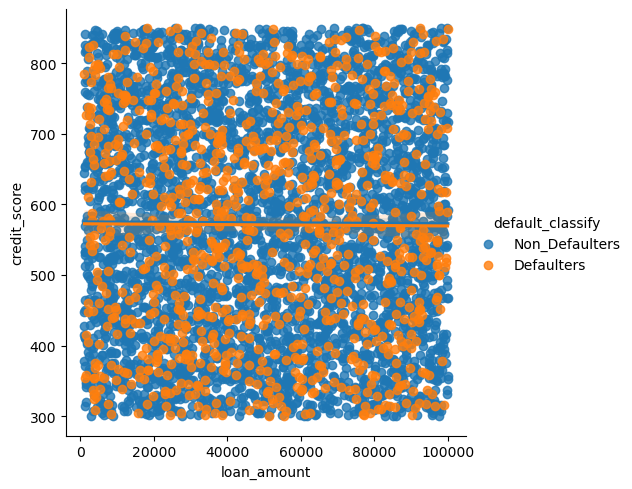

In [16]:
#finding the correlation
sns.lmplot(x="loan_amount", y="credit_score", hue="default_classify", data=data)
plt.show()

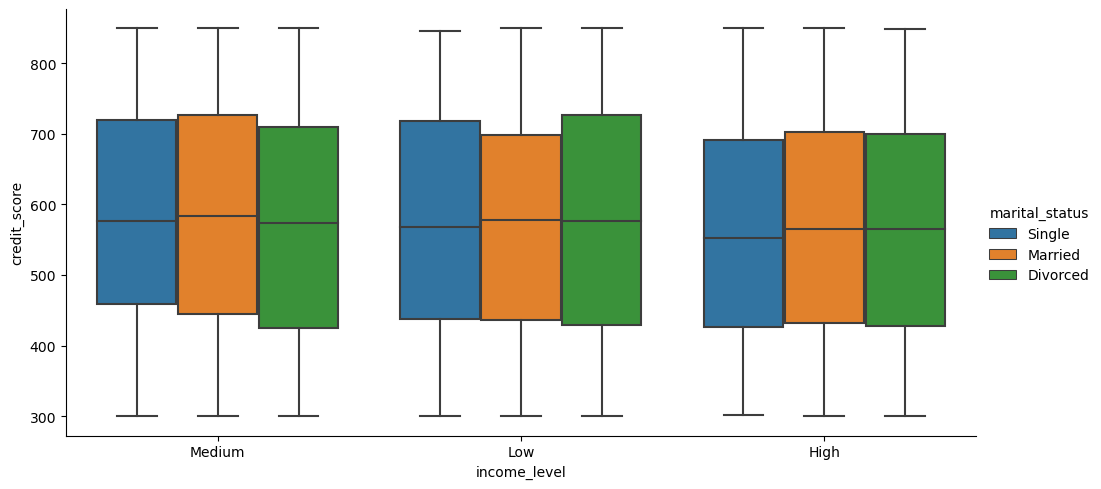

In [17]:
#We visualize the credit score
sns.catplot(x="income_level", y="credit_score", hue="marital_status", 
               data=data, aspect=2, kind="box")
plt.show()

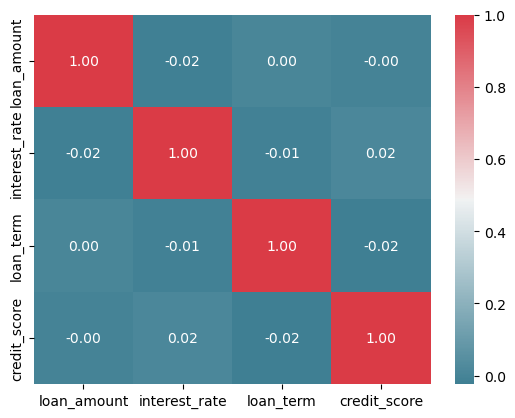

In [18]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

In [19]:
### there is  negative correlation between credit score of the customer and loan amount . 
###  loans with high amount were granted to the customer regardless of their credit score.

In [20]:
#-----------------Decision Tree Modeling-------------------------------------------


In [21]:
# predict the loan defaulter and non_defaulter using Deceision tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [22]:
# Step 2 : Prepare the data 

# Prepare the dependent dataset for dependent variable
#data was reduce to 200 rows for prediction purpose
y=data['default_classify']


In [23]:
#preparing data for independent variable
#mapping the categroical column to nummeric for the predictive model

data["employment_type"]= data.employment_type.map({'Self-employed': 0, 'Full-time': 1, 'Part-time': 2}).astype('int')
data["income_level"]= data.income_level.map({'Medium': 1, 'Low': 0, 'High': 2}).astype('int')
data["education_level"]= data.education_level.map({'Master': 2, 'Bachelor': 1, 'High School': 0, 'PhD': 3}).astype('int')
data["marital_status"]= data.marital_status.map({'Single': 1, 'Married': 2, 'Divorced': 0}).astype('int')

In [24]:
#Prepare the independent for independent variable
# --- Dropping columns
x = data.drop(columns= ['customer_id','loan_id','interest_rate','loan_term',
                        'application_date','approval_date','disbursement_date','default_status','default_classify',
                        'due_date','loan_type','gender','loan_amount'
                       ],
              axis='columns')

In [25]:
x.columns

Index(['employment_type', 'income_level', 'credit_score', 'marital_status',
       'education_level'],
      dtype='object')

In [26]:
# Create the model

model=DecisionTreeClassifier()


In [27]:
# Split the model into test and training data 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
y_test

1501    Non_Defaulters
2586    Non_Defaulters
2653    Non_Defaulters
1055    Non_Defaulters
705     Non_Defaulters
             ...      
4711    Non_Defaulters
2313    Non_Defaulters
3214        Defaulters
2732        Defaulters
1926    Non_Defaulters
Name: default_classify, Length: 1000, dtype: object

In [29]:
# Train our model

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
# X_train data 

X_train

,employment_type,income_level,credit_score,marital_status,education_level
4227,0,0,535,2,3
4676,2,1,359,1,3
800,0,0,445,0,0
3671,0,1,847,2,1
4193,0,1,691,1,0
...,...,...,...,...,...
4426,2,0,822,1,2
466,0,0,792,2,2
3092,1,1,757,2,2
3772,2,2,599,2,0


In [31]:

#y_train data 

y_train
# X_test data 
# y_test data 
y_test
X_test

,employment_type,income_level,credit_score,marital_status,education_level
1501,0,2,408,2,0
2586,0,1,474,0,1
2653,1,0,454,1,0
1055,1,0,596,2,3
705,2,0,513,1,0
...,...,...,...,...,...
4711,0,2,685,2,2
2313,2,2,313,0,2
3214,0,2,834,2,0
2732,2,2,698,1,2


In [32]:
predictions=model.predict(X_test)


In [33]:
predictions

array(['Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Defaulters', 'Defaulters', 'Non_Defaulters', 'Defaulters',
       'Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Defaulters', 'Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Defaulters', 'Non_Defaulters

In [69]:

prediction_accuracy=accuracy_score(y_test,predictions)
prediction_accuracy

0.7

In [35]:
#visulaize the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

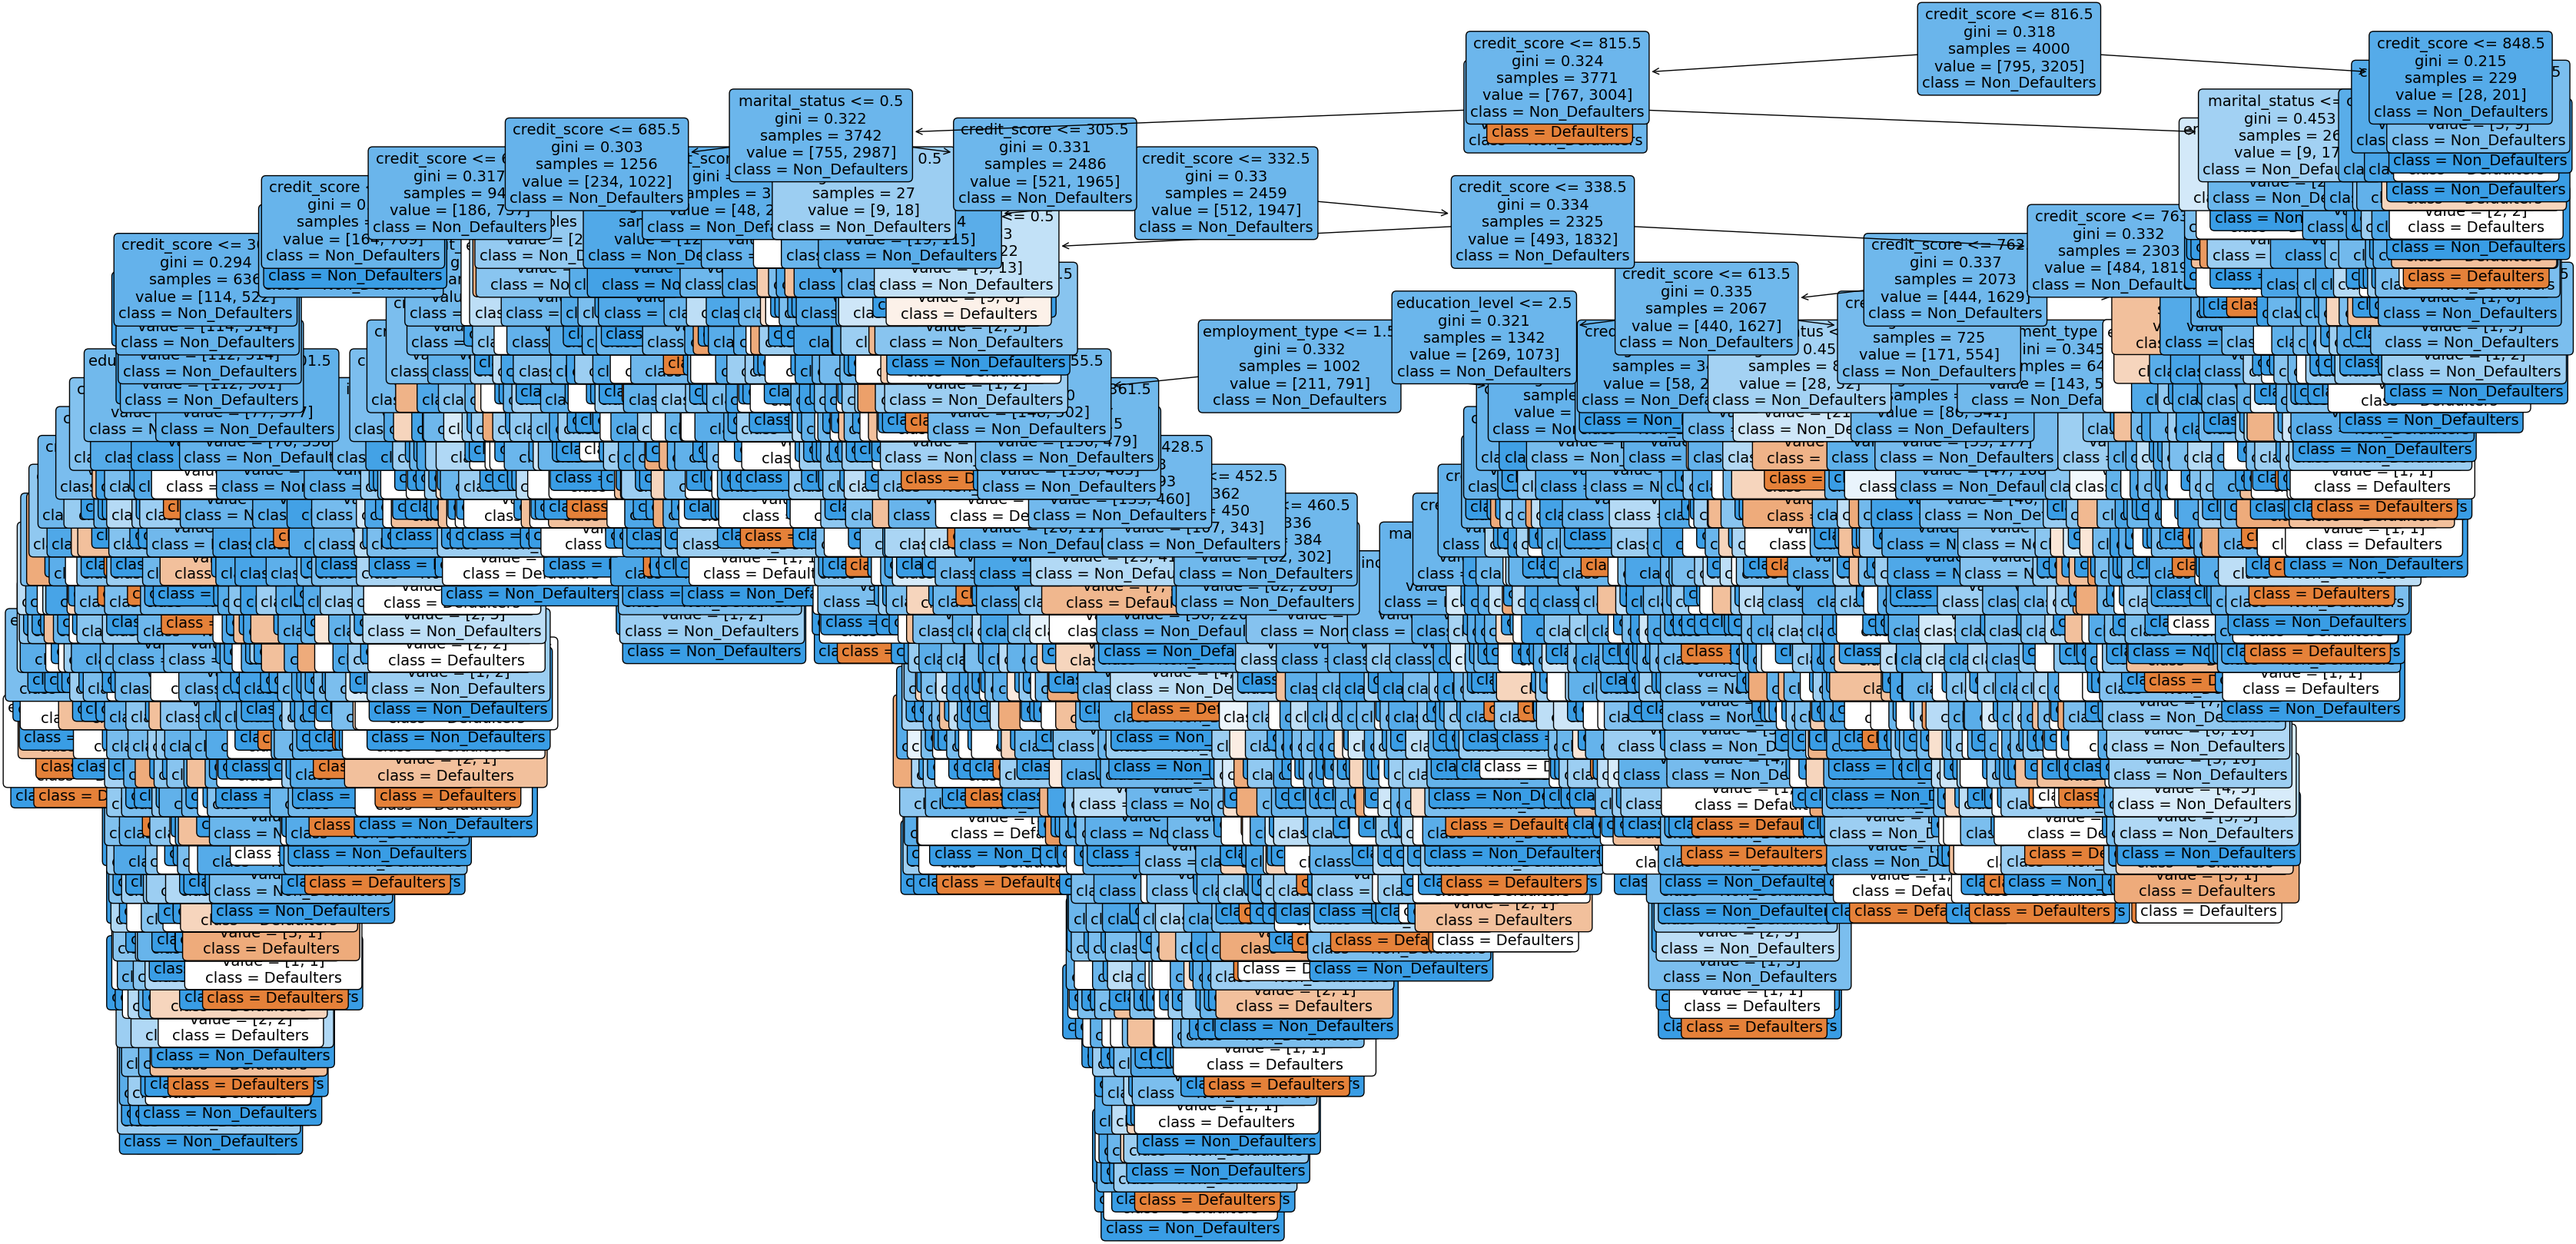

In [36]:
plt.figure(figsize=(40,20))
dtree_plot = tree.plot_tree(model,
        feature_names = ['employment_type', 'income_level', 'credit_score', 'marital_status',
       'education_level'],
        class_names = sorted(y.unique()),
        filled = True,
        rounded = True,
        fontsize = 14)
plt.show()

In [37]:
# -------------REDUCING THE DATASET,For CLEAR VISUALIZATION-----------------------------------

In [38]:
datashort = data.head(200)

In [39]:
y_data = datashort['default_classify']


In [40]:
x_data = datashort.drop(columns= ['customer_id','loan_id','interest_rate','loan_term',
                        'application_date','approval_date','disbursement_date','default_status','default_classify',
                        'due_date','loan_type','gender','loan_amount'
                       ],
              axis='columns')

In [61]:
x_data.columns

Index(['employment_type', 'income_level', 'credit_score', 'marital_status',
       'education_level'],
      dtype='object')

In [62]:
model_data=DecisionTreeClassifier()


In [63]:
# Split the model into test and training data 
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [64]:
# Train our model

model_data=DecisionTreeClassifier()
model_data.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
predicts=model_data.predict(X_test)


In [66]:
predicts

array(['Non_Defaulters', 'Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Non_Defaulters', 'Defaulters',
       'Non_Defaulters', 'Non_Defaulters', 'Defaulters', 'Non_Defaulters',
       'Non_Defaulters', 'Non_Defaulters'], dtype=object)

In [67]:
prediction_accuracy=accuracy_score(y_test,predicts)
prediction_accuracy

0.7

In [92]:
#visulaize the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt2

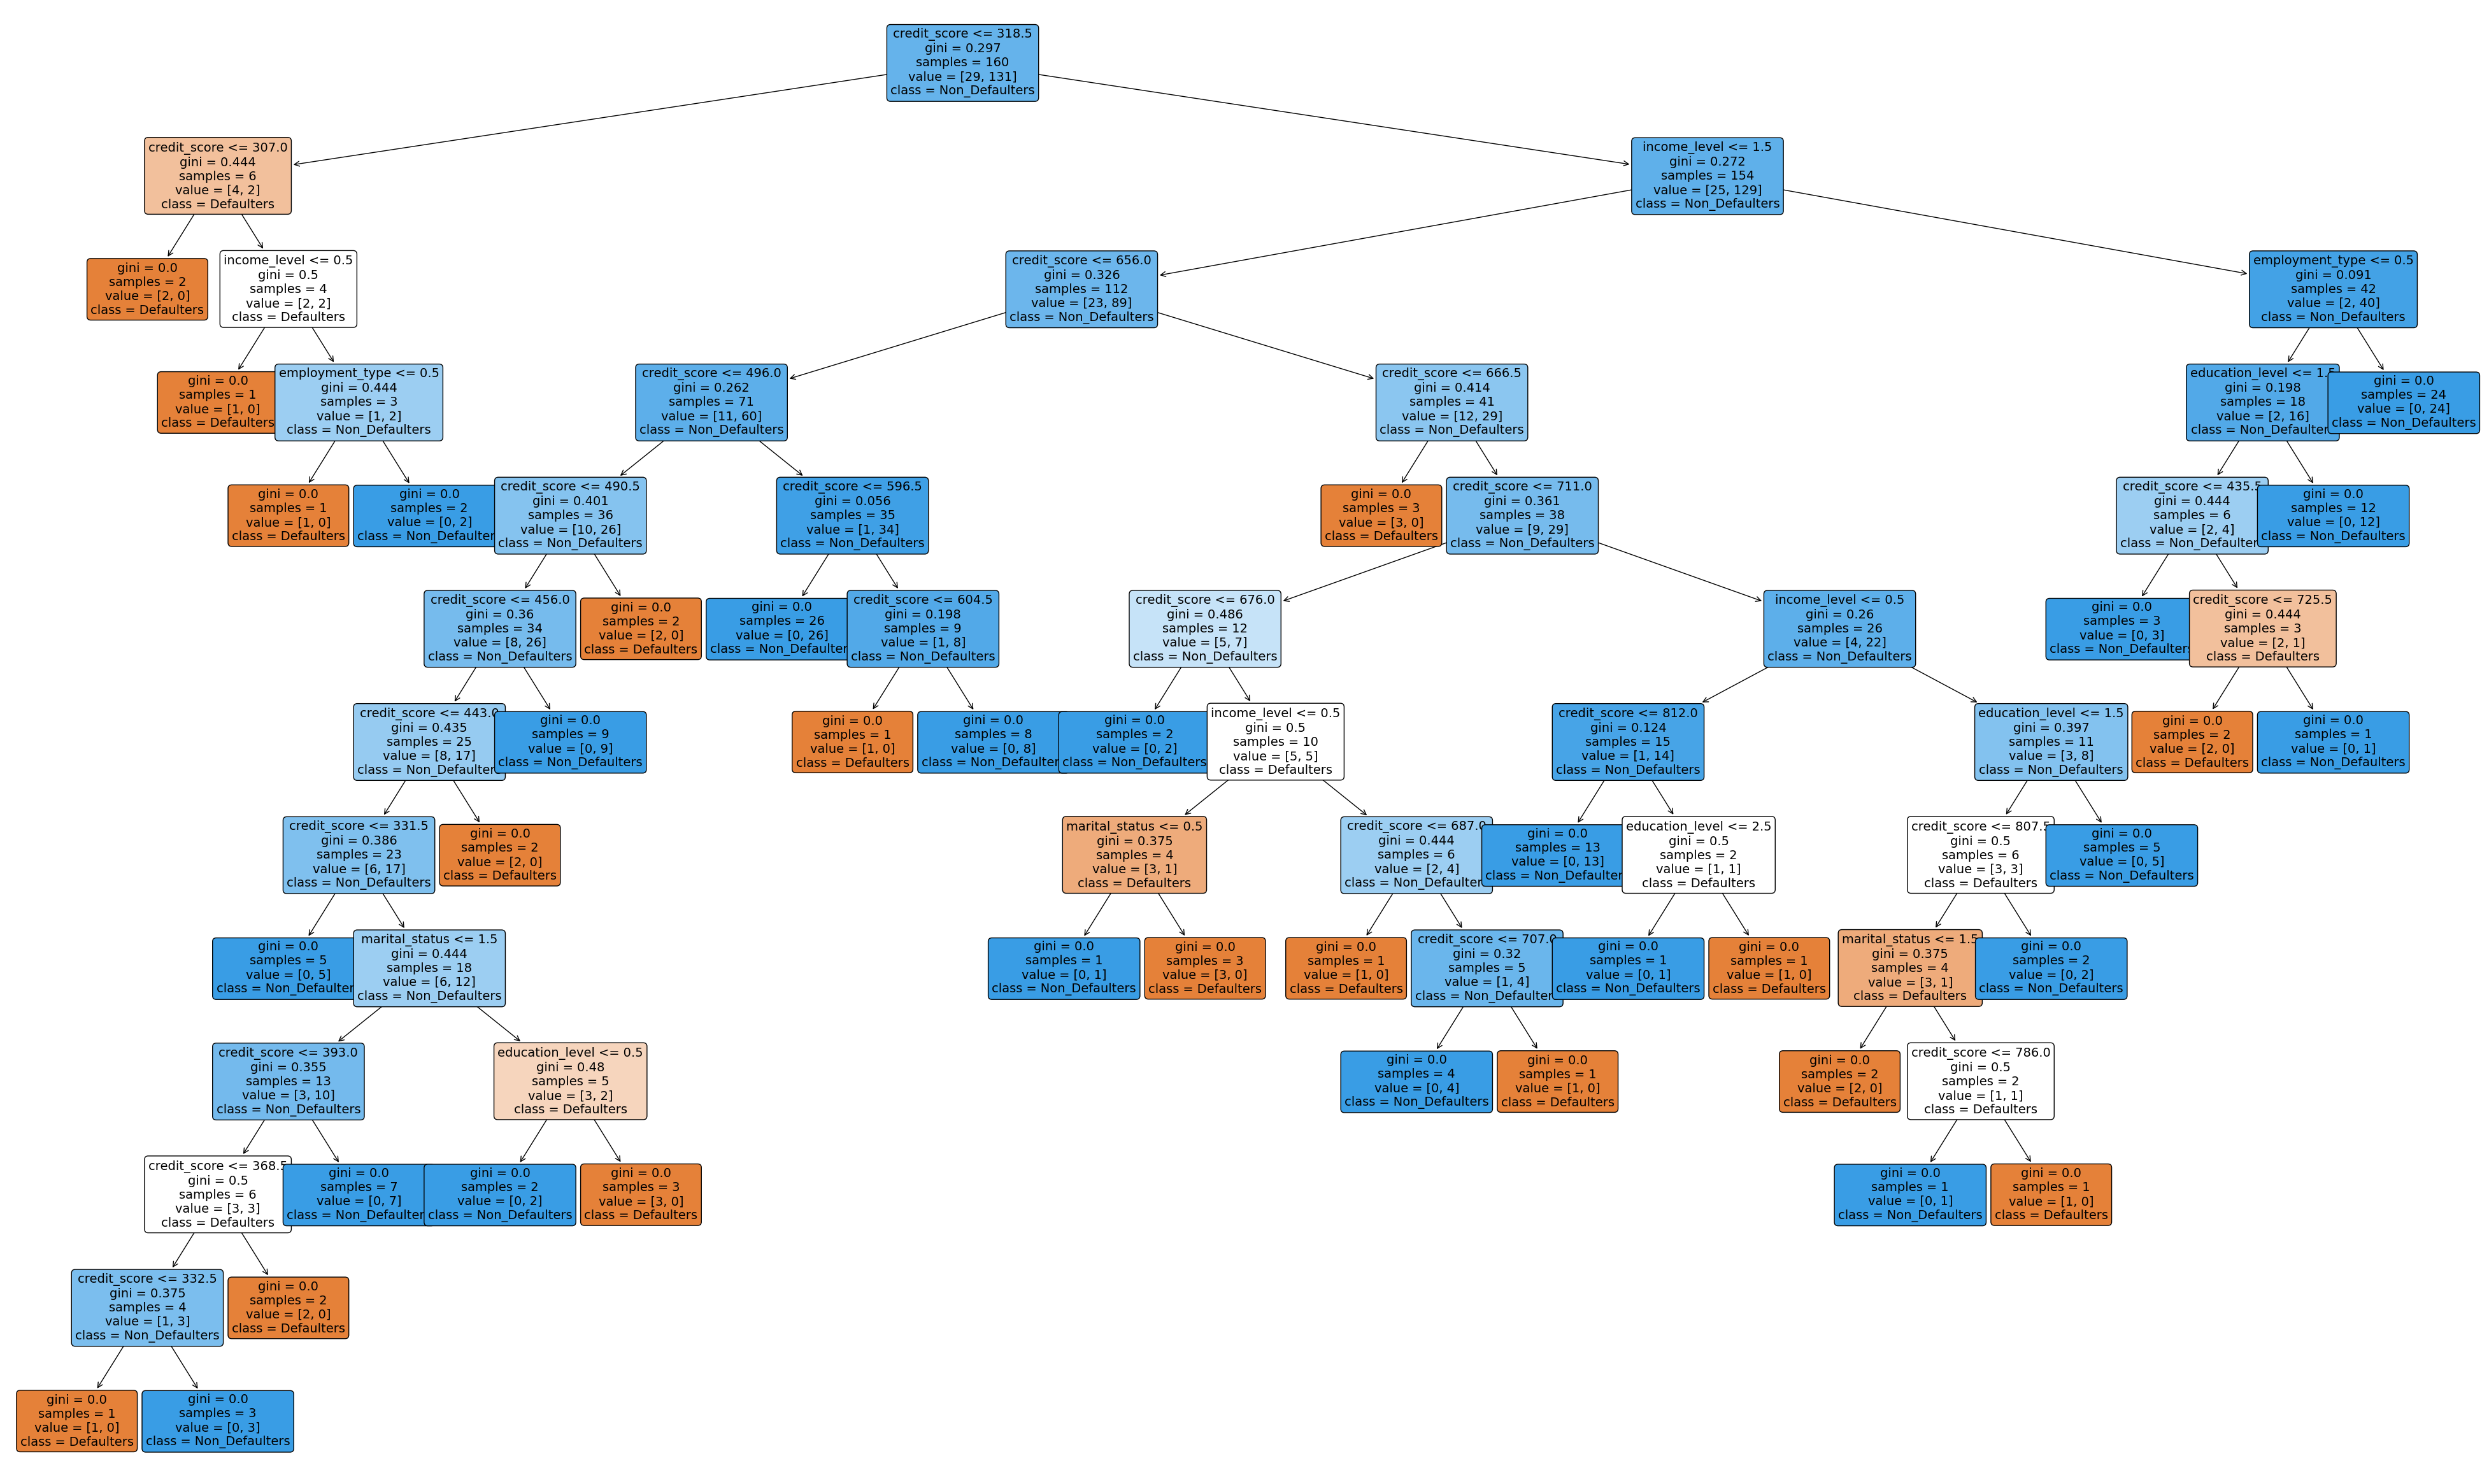

In [93]:
plt2.figure(figsize=(50,30))
dtree_plot = tree.plot_tree(model,
        feature_names = ['employment_type', 'income_level', 'credit_score', 'marital_status',
       'education_level'],
        class_names = sorted(y_data.unique()),
        filled = True,
        rounded = True,
        fontsize = 14)
plt2.savefig("C:\\Users\Kasutaja\\Downloads\\treeloan_picture2.png")

plt2.show()